In [1]:
#It is just a feature that only exiprience ... nothing else
import cv2
import numpy as np
import ipywidgets as widgets
from IPython.display import display
from ipyevents import Event
from PIL import Image
from io import BytesIO

img = cv2.imread('elephant.jpg')  # Load image
image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Convert full-size image to PNG bytes
def array_to_png_bytes(arr):
    img_pil = Image.fromarray(arr)
    with BytesIO() as output_bytes:
        img_pil.save(output_bytes, format='PNG')
        return output_bytes.getvalue()

# Create image widget with original size
height, width, _ = image_rgb.shape
png_bytes = array_to_png_bytes(image_rgb)

image_widget = widgets.Image(
    value=png_bytes,
    format='png',
    layout=widgets.Layout(width=f"{width}px", height=f"{height}px")
)
display(image_widget)

# Setup event handler for clicks
event = Event(source=image_widget, watched_events=['click'])

def handle_event(event_data):
    x = int(event_data['offsetX'])
    y = int(event_data['offsetY'])
    print(f"Clicked at: X={x}, Y={y}")

event.on_dom_event(handle_event)

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x04\x00\x00\x00\x02\xab\x08\x02\x00\x00\x00\xe0th\xc…

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import cv2 as cv

img = cv2.imread('elephant.jpg')  # Load image
image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [3]:
sample_coords= [(361,572),(470,550),(566,496),(209,349),(544,334)]

sample_rgb_values= []

for coord in sample_coords:
    y,x = coord
    rgb= image_rgb[y,x]
    sample_rgb_values.append(rgb)

for i in range (len(sample_coords)):
    coord = sample_coords[i]
    rgb=  sample_rgb_values[i]
    print(f"P{i+1} at {coord} the rgb values is {rgb}")


P1 at (361, 572) the rgb values is [67 61 71]
P2 at (470, 550) the rgb values is [71 70 76]
P3 at (566, 496) the rgb values is [2 2 4]
P4 at (209, 349) the rgb values is [185 172 189]
P5 at (544, 334) the rgb values is [0 0 2]


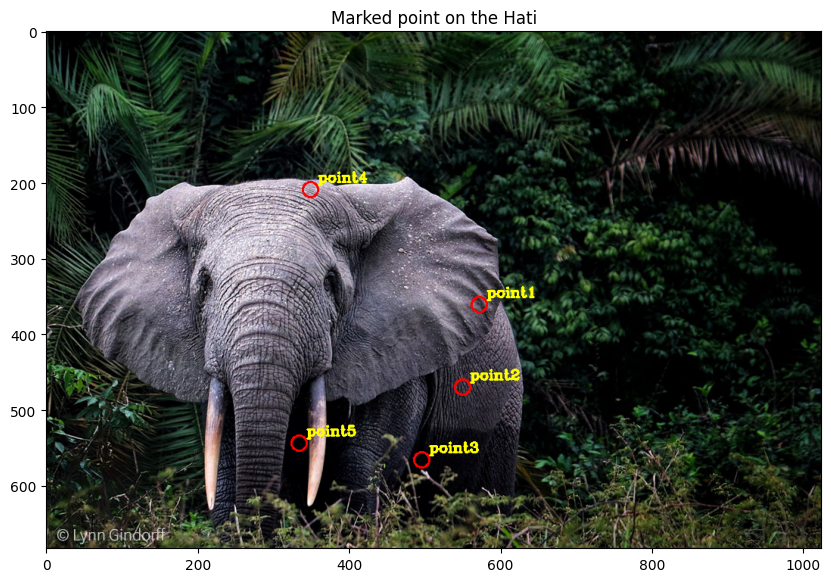

In [4]:
# mark the point on the image
image_marked= image_rgb.copy()
index=1
for i in range(len(sample_coords)):
    coord= sample_coords[i]
    y= coord[0]
    x= coord[1]

    cv.circle(image_marked, (x,y), 10, (255,0,0), 2)

    #let put some marking on the image
    cv.putText(image_marked, f"point{index}", (x+10, y-10),cv.FONT_HERSHEY_COMPLEX, 0.6, (255,255,0), 2)
    index+=1


plt.figure(figsize= (10,8))
plt.imshow(image_marked)
plt.title("Marked point on the Hati")
plt.axis("on")
plt.show()

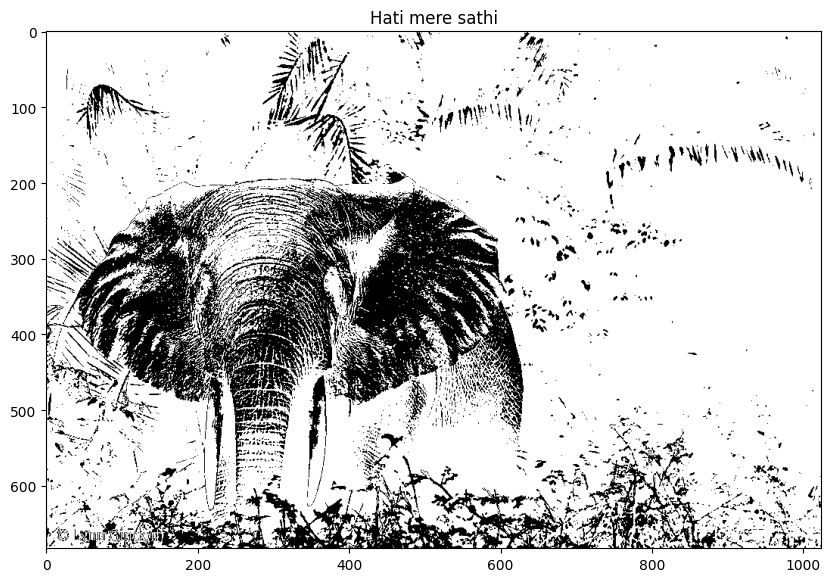

In [5]:
lower_thresh= [60,60,65]  #those are atjustable thesold value for clear image
upper_thresh= [170,170,180]  #those are atjustable thesold value for clear image
height= image_rgb.shape[0]
width= image_rgb.shape[1]

elephant_detected= np.ones((height,width), dtype=np.uint8)*255

for y in range(height):
    for x in range(width):
        pixel= image_rgb[y,x]
        r,g,b= pixel[0],pixel[1],pixel[2]

        if (lower_thresh[0]<=r<=upper_thresh[0] and lower_thresh[1]<=r<=upper_thresh[1] and lower_thresh[2]<=r<=upper_thresh[2]):
            elephant_detected[y,x]=0
        else:
            elephant_detected[y,x]=255


plt.figure(figsize= (10,8))
plt.imshow(elephant_detected, cmap='gray')
plt.title("Hati mere sathi")
plt.axis("on")
plt.show()
